In [4]:
%load_ext autoreload
%autoreload 2
import re
import pandas as pd
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
pd.set_option('max_columns', 200)
pd.set_option('max_rows', 200)
import os
import sys
HOME = os.path.expanduser("~")
sys.path.append(f'{HOME}/kaggle/data_analysis/library')
import utils
from utils import get_categorical_features, get_numeric_features
import eda

os.listdir('../input/')
key = 'card_id'
target = 'target'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
is_pickle = False

def elo_load_data(filename=''):
    
    if len(filename):
        df = utils.read_df_pkl(path=f'../input/{filename}*.p')
        return df
    # read pickle
    path_list = glob.glob("../input/*.p")
    for path in path_list:
        filename = re.search(r'/([^/.]*).gz', path).group(1)
        df = utils.read_df_pkl(path=f'../input/{filename}*.p')

if is_pickle:
    import glob
    path_list = glob.glob('../input/*.csv')
    df_list = []
    for i, path in enumerate(path_list):
        df_list.append(pd.read_csv(path))
    
    for df, path in zip(df_list, path_list):
        filename = re.search(r'/([^/.]*).csv', path).group(1)
        utils.to_df_pkl(path='../input/', fname=f"{filename}", df=df)

In [22]:
historical = elo_load_data('historical')
new = elo_load_data('new_')

100%|██████████| 3/3 [00:01<00:00,  2.33it/s]


In [29]:
eda_result = pd.DataFrame()
for i, df in enumerate(df_list):
    filename = re.search(r'/([^/.]*).csv', path_list[i]).group(1)
    df = eda.df_info(df)
    df['filename'] = filename
    
    if len(eda_result):
        eda_result = pd.concat([eda_result, df], axis=0)
    else:
        eda_result = df.copy()
        
eda_result.to_csv(f'../eda/eda_df_info.csv', index=True)

Shape: (201917, 6)
Categorical: first_active_month
Categorical: card_id
Shape: (123623, 2)
Categorical: card_id
Shape: (334696, 22)
Categorical: merchant_id
Categorical: category_1
Categorical: most_recent_sales_range
Categorical: most_recent_purchases_range
Categorical: category_4
Shape: (1963031, 14)
Categorical: authorized_flag
Categorical: card_id
Categorical: category_1
Categorical: category_3
Categorical: merchant_id
Categorical: purchase_date
Shape: (123623, 5)
Categorical: first_active_month
Categorical: card_id
Shape: (29112361, 14)
Categorical: authorized_flag
Categorical: card_id
Categorical: category_1
Categorical: category_3
Categorical: merchant_id
Categorical: purchase_date


In [30]:
train = df_list[0]
merchants = df_list[2]
new_merchant_transactions = df_list[3]
test = df_list[4]
historical = df_list[5]

In [88]:
target = 'target'
ignore_list = ['card_id', 'target']
train = train.sort_values(by='first_active_month')
sys.exit()

df = train
for col in df.columns:
    if col in ignore_list:
        continue
    print(col)
    df_cnt = df[col].value_counts()
    plt.figure(figsize=(20, 6))
    sns.barplot(x=df_cnt.sort_index().index, y=df_cnt.sort_index())
    plt.xticks(rotation=90)
    
    df_cnt = test[col].value_counts()
    plt.figure(figsize=(20, 6))
    sns.barplot(x=df_cnt.sort_index().index, y=df_cnt.sort_index())
    plt.xticks(rotation=90)
    
    plt.show()

SystemExit: 

### Trainの数字

In [114]:
key = 'card_id'
display(train.head())
print(train[key].drop_duplicates().shape)
print(train[[key, 'first_active_month']].drop_duplicates().shape)
print(train['first_active_month'].min())
print(train['first_active_month'].max())

,first_active_month,card_id,feature_1,feature_2,feature_3,target
69678,2011-11,C_ID_f25b3d3f13,3,1,1,0.645766
145874,2011-11,C_ID_2dbbc2b7fd,3,3,1,-0.069560
9322,2011-11,C_ID_0a70866829,3,1,1,-2.544361
33398,2011-11,C_ID_08cb8e0333,3,3,1,-3.573636
152463,2011-11,C_ID_d26de4d1bf,3,3,1,-0.693447


(201917,)
(201917, 2)
2011-11
2018-02
object


### Newの数字

In [158]:
display(new_merchant_transactions.shape)
display(new_merchant_transactions.head())
print(new_merchant_transactions['purchase_date'].min())
print(new_merchant_transactions['purchase_date'].max())
print(new_merchant_transactions[[key, 'merchant_id']].drop_duplicates().shape)

(1963031, 15)

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id,yyyymm
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.557574,2018-03-11 14:57:36,1.0,9,19,2018-03
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.569580,2018-03-19 18:53:37,1.0,9,19,2018-03
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551037,2018-04-26 14:08:44,1.0,9,14,2018-04
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.671925,2018-03-07 09:43:21,NaN,-1,8,2018-03
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.659904,2018-03-22 21:07:53,NaN,-1,29,2018-03


2017-03-01 03:24:51
2018-04-30 23:59:59
(1962211, 2)



### New merchant_idはたぶん商品ID. みんなが買う商品は多くのcard_idに登場する
city, stateが違うと同じmerchant_idでも別レコードになる。買ってる場所が違うから当然だが。

In [157]:
df = new_merchant_transactions.copy()
from itertools import combinations
id_list = [col for col in df.columns if col.count('_id')]

for i in id_list:
    j = 'merchant_id'
#     max_0 = df.groupby(j)[i].size().sort_values(ascending=False).values[0]
    cnt = df.groupby(j)[i].size().sort_values(ascending=False)
    print(cnt.head())
    
#     if max_0==1:
#         print(f"{i} {j}")
#     max_1 = df.groupby(j)[i].size().sort_values(ascending=False).values[0]
#     if max_1==1:
#         print(f"{j} {i}")

id_list.remove('card_id')
new_merchant_transactions[new_merchant_transactions['merchant_id']=='M_ID_00a6ca8a8a'][id_list].drop_duplicates()

,city_id,merchant_category_id,merchant_id,state_id,subsector_id
31,69,879,M_ID_00a6ca8a8a,9,29
422,-1,879,M_ID_00a6ca8a8a,-1,29
70152,69,511,M_ID_00a6ca8a8a,9,7
103417,-1,511,M_ID_00a6ca8a8a,-1,7


上記データをもとにmerchant_category_id毎の最大・最小日付を見ると、201704を境にIDが変わったとわかる

### Testの数字

In [119]:
key = 'card_id'
display(test.head())
print(test[key].drop_duplicates().shape)
print(test['first_active_month'].dropna().min())
print(test['first_active_month'].dropna().max())

,first_active_month,card_id,feature_1,feature_2,feature_3
0,2017-04,C_ID_0ab67a22ab,3,3,1
1,2017-01,C_ID_130fd0cbdd,2,3,0
2,2017-08,C_ID_b709037bc5,5,1,1
3,2017-12,C_ID_d27d835a9f,2,1,0
4,2015-12,C_ID_2b5e3df5c2,5,1,1


(123623,)
2011-11
2018-01


### Train/TestとNewにおけるcard_idの紐付き

In [122]:
print(train[key].drop_duplicates().shape)
tmp = train.merge(new_merchant_transactions, how='inner', on=key)
print(tmp[key].drop_duplicates().shape)

print(test[key].drop_duplicates().shape)
tmp = test.merge(new_merchant_transactions, how='inner', on=key)
print(tmp[key].drop_duplicates().shape)

(201917,)
(123623,)


SystemExit: 

### Train/Testとhistrical_transactionにおけるcard_idの紐付き数

In [126]:
print(train[key].drop_duplicates().shape)
tmp = train.merge(historical, how='inner', on=key)
print(tmp[key].drop_duplicates().shape)

print(test[key].drop_duplicates().shape)
tmp = test.merge(historical, how='inner', on=key)
print(tmp[key].drop_duplicates().shape)

(201917,)
(201917,)
(123623,)
(123623,)


### merchantsの数字
merchantsは日付をもっておらず、集計値が入っている。  
いつ時点の集計情報なのかは不明

In [130]:
display(merchants.head())
print('merchant_id')
print(merchants['merchant_id'].drop_duplicates().shape)
print('merchant_group_id')
print(merchants['merchant_group_id'].drop_duplicates().shape)
print('merchant_category_id')
print(merchants['merchant_category_id'].drop_duplicates().shape)
print('subsector_id')
print(merchants['subsector_id'].drop_duplicates().shape)
print('city_id')
print(merchants['city_id'].drop_duplicates().shape)
print('state_id')
print(merchants['state_id'].drop_duplicates().shape)

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057471,-0.057471,N,E,E,-0.40,9.666667,3,-2.25,18.666667,6,-2.32,13.916667,12,N,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057471,-0.057471,N,E,E,-0.72,1.750000,3,-0.74,1.291667,6,-0.57,1.687500,12,N,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057471,-0.057471,N,E,E,-82.13,260.000000,2,-82.13,260.000000,2,-82.13,260.000000,2,N,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057471,-0.057471,Y,E,E,NaN,1.666667,3,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057471,-0.057471,Y,E,E,NaN,0.500000,3,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,NaN


merchant_id
(334633,)
merchant_group_id
(109391,)
merchant_category_id
(324,)
subsector_id
(41,)
city_id
(271,)
state_id
(25,)


### historical transactionの数字

In [134]:
df = historical
df.head()
display(df.head())
print('merchant_id')
print(df['merchant_id'].drop_duplicates().shape)
print('merchant_category_id')
print(df['merchant_category_id'].drop_duplicates().shape)
print('subsector_id')
print(df['subsector_id'].drop_duplicates().shape)
print('city_id')
print(df['city_id'].drop_duplicates().shape)
print('state_id')
print(df['state_id'].drop_duplicates().shape)
print(df['purchase_date'].dropna().min())
print(df['purchase_date'].dropna().max())

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


merchant_id
(326312,)
merchant_category_id
(327,)
subsector_id
(41,)
city_id
(308,)
state_id
(25,)
2017-01-01 00:00:08
2018-02-28 23:59:51


### まずはNew merchantsとHistoricalをTrainにつけていくのがよさげ

In [23]:
display(new.head())
display(historical.head())

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.557574,2018-03-11 14:57:36,1.0,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.569580,2018-03-19 18:53:37,1.0,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551037,2018-04-26 14:08:44,1.0,9,14
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.671925,2018-03-07 09:43:21,NaN,-1,8
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.659904,2018-03-22 21:07:53,NaN,-1,29


,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id,yyyymm
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37,2017-06
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16,2017-07
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37,2017-08
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34,2017-09
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37,2017-03


### newとhistoricalのcard_idのmonth_lagは同じなのか？
同じっぽい。なのでUNIONしてOK

In [41]:
new_id = np.array(list(set(new[key].values)))[:100]
new['yyyymm'] = new['purchase_date'].map(lambda x: str(x)[:7])
new_100 = new.set_index(key).loc[new_id, :][['month_lag', 'yyyymm']]
hist_100 = historical.set_index(key).loc[new_id, :][['month_lag', 'yyyymm']]

df_100 = new_100.reset_index().merge(hist_100.reset_index(), how='inner', on=[key, 'yyyymm'])
display(new_100.loc['C_ID_ae55ec6317', :].sort_values(by='yyyymm').head(20))
display(hist_100.loc['C_ID_ae55ec6317', :].sort_values(by='yyyymm'))

,month_lag,yyyymm
card_id,,
C_ID_ae55ec6317,1,2018-02
C_ID_ae55ec6317,1,2018-02
C_ID_ae55ec6317,1,2018-02
C_ID_ae55ec6317,1,2018-02
C_ID_ae55ec6317,2,2018-03
C_ID_ae55ec6317,2,2018-03


,month_lag,yyyymm
card_id,,
C_ID_ae55ec6317,-8,2017-05
C_ID_ae55ec6317,-8,2017-05
C_ID_ae55ec6317,-8,2017-05
C_ID_ae55ec6317,-8,2017-05
C_ID_ae55ec6317,-8,2017-05
C_ID_ae55ec6317,-8,2017-05
C_ID_ae55ec6317,-8,2017-05
C_ID_ae55ec6317,-8,2017-05
C_ID_ae55ec6317,-8,2017-05


### month_lagはcard_idの粒度で個別に振られている.
下記の例だと、2017-04が最終月となっているcardなので、2017-04においてmonth_lag=0となっている

In [188]:
card_list =  historical.query("yyyymm=='2017-04' & month_lag==0 ")
display(card_list[key].drop_duplicates()[:20])

32766     C_ID_bb6e3b62f7
55860     C_ID_855fbbcbe0
70534     C_ID_bb2a7947f5
118625    C_ID_26e4e51ee0
209519    C_ID_adeaadcc35
225105    C_ID_78bc3fd563
236842    C_ID_9cb2a0a803
240979    C_ID_92b8917e99
340333    C_ID_2140081cb2
344199    C_ID_69e87583b6
378169    C_ID_eb2e98e63e
400607    C_ID_e2ab9d6672
446314    C_ID_f58af5df3b
447503    C_ID_c28fc60a3e
462939    C_ID_2af8ce1a1b
599111    C_ID_acc4ad4861
635705    C_ID_b02d4eebc7
739605    C_ID_3f21952cd3
767141    C_ID_5045d2c6de
810993    C_ID_c82f712032
Name: card_id, dtype: object

In [189]:
historical.set_index(key).loc['C_ID_bb2a7947f5', :].sort_values(by='yyyymm')

,authorized_flag,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id,yyyymm
card_id,,,,,,,,,,,,,,
C_ID_bb2a7947f5,Y,149,N,0,A,307,M_ID_fcfccdcca8,-3,-0.656749,2017-01-23 16:50:08,5.0,20,19,2017-01
C_ID_bb2a7947f5,N,149,N,0,A,278,M_ID_1b0df22af1,-3,-0.720611,2017-01-16 16:21:24,5.0,20,37,2017-01
C_ID_bb2a7947f5,Y,53,N,0,A,705,M_ID_842c4f7e03,-3,-0.730003,2017-01-22 10:08:09,5.0,20,33,2017-01
C_ID_bb2a7947f5,Y,149,N,0,A,80,M_ID_00ae6d79d3,-3,-0.692812,2017-01-26 22:18:55,5.0,20,37,2017-01
C_ID_bb2a7947f5,Y,149,N,0,A,705,M_ID_96fad20d15,-3,-0.704082,2017-01-28 19:13:21,5.0,20,33,2017-01
C_ID_bb2a7947f5,Y,149,N,0,A,705,M_ID_8450b55d77,-3,-0.728470,2017-01-29 21:39:12,5.0,20,33,2017-01
C_ID_bb2a7947f5,Y,149,N,0,A,705,M_ID_96fad20d15,-3,-0.744068,2017-01-21 17:18:32,5.0,20,33,2017-01
C_ID_bb2a7947f5,Y,149,N,0,A,813,M_ID_5fb34db853,-3,-0.682294,2017-01-19 17:31:20,5.0,20,29,2017-01
C_ID_bb2a7947f5,Y,149,N,0,A,705,M_ID_96fad20d15,-3,-0.706441,2017-01-21 17:17:44,5.0,20,33,2017-01


### TrainとTestにあるcard_idのlast_monthを見てみる

In [13]:
id_yyyymm_max = historical.groupby(key)['yyyymm'].max()
id_yyyymm_max.head(20)

card_id
C_ID_00007093c1    2018-02
C_ID_0001238066    2018-02
C_ID_0001506ef0    2018-02
C_ID_0001793786    2017-10
C_ID_000183fdda    2018-02
C_ID_00024e244b    2018-02
C_ID_0002709b5a    2018-02
C_ID_00027503e2    2018-01
C_ID_000298032a    2018-01
C_ID_0002ba3c2e    2017-10
C_ID_0002c7c2c1    2018-01
C_ID_00032df08f    2017-11
C_ID_0003754056    2017-12
C_ID_000377f6a0    2018-01
C_ID_0003be3c83    2018-02
C_ID_0003f41435    2018-02
C_ID_00042d509c    2017-12
C_ID_0004587331    2018-01
C_ID_0004725b87    2018-01
C_ID_0004888ddd    2018-01
Name: yyyymm, dtype: object

last_monthは2017-02~2018-02

In [17]:
np.sort(np.unique(id_yyyymm_max.values))

array(['2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07',
       '2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-01',
       '2018-02'], dtype=object)

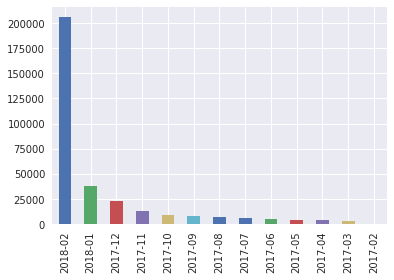

In [21]:
id_yyyymm_max.value_counts().plot(kind='bar')